In [1]:
import pandas as pd
import glob
import json
#import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import os
#print(os.listdir("../input"))
import spacy
import random 
from collections import Counter #for counting
import seaborn as sns #for visualization
#load spacy
import spacy
import numpy as np
from spacy.lang.en import English #this tells the library to load the english character maps

In [2]:

files = glob.glob('data/tweet_oldold/*')
#files = glob.glob('user/*')
len(files)

1110

In [3]:
dictlist = []

for file in files:
    json_string = open(file, 'r').read()
    json_dict = json.loads(json_string)
    dictlist.append(json_dict)

In [4]:

df = pd.DataFrame(dictlist)

df = df.replace({'\n': ' '}, regex=True) # remove linebreaks in the dataframe
df = df.replace({'\t': ' '}, regex=True) # remove tabs in the dataframe
df = df.replace({'\r': ' '}, regex=True) # remove carriage return in the dataframe
df.rename(columns={'text':'tweet'}, inplace=True)

In [5]:
df.head()


,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,tweet,url,user_id,usernameTweet
0,1158133751790166022,2019-08-04 17:52:58,NaN,True,False,NaN,0,1,0,I'm not trying to change your mind. Experience...,/KimreyThinks/status/1158133751790166022,319398000,KimreyThinks
1,1158134145312350208,2019-08-04 17:54:31,NaN,False,False,NaN,9,0,1,uswnt insta post for kelley is cute cute,/keIIohara/status/1158134145312350208,1152752391302909953,keIIohara
2,1158134472912433152,2019-08-04 17:55:50,NaN,False,False,NaN,30,0,0,So yesterday at the #USWNT game pre-game they...,/_LeslieJ/status/1158134472912433152,79362852,_LeslieJ
3,1158134558547574785,2019-08-04 17:56:10,NaN,False,False,NaN,3,0,0,Had an amazing first Rose Bowl experience last...,/karlhuhta/status/1158134558547574785,425918166,karlhuhta
4,1158134745575907333,2019-08-04 17:56:55,NaN,False,False,NaN,68,0,17,"""That was the turning point for me, where it w...",/SebiSalazarFUT/status/1158134745575907333,260525069,SebiSalazarFUT


In [6]:
nlp = spacy.load('en_core_web_sm')



In [7]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS #bring in the default stop words

In [8]:
print('Number of stop words: %d' % len(spacy_stopwords))

Number of stop words: 326


In [9]:
print('First ten stop words: %s' % list(spacy_stopwords)[:20])

First ten stop words: ['three', 'amount', 'whom', 'keep', 'whence', 'us', '‘ll', 'with', 'whereby', 'unless', 'since', 'several', '’s', 'yet', 'thus', 'go', '’d', '‘ve', 'third', 'seemed']


In [10]:
#import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import os
#print(os.listdir("../input"))
import spacy
import random 
from collections import Counter #for counting
import seaborn as sns #for visualization

In [12]:
random.seed(888)
text = df.tweet[random.sample(range(1,1000),10)]
text

82                        S/o the  USWNT  tho  They ball
443    I so want a USA Beat Everybody shirt and USA V...
598    She looking great and hope she keeps that winn...
456    Going back to the classroom tomorrow and dream...
938    Finalizó #SegundoPeriodo  @USWNT  5-0 @Bahamas...
509    Happy Birthday. From a fan who appreciates the...
396    Just a reminder that "The National Team" is av...
645    I was watching all 2018  uswnt  goals and Morg...
384                         But it's not pinstriped. Lol
555    And the women's percentage is larger than the ...
Name: tweet, dtype: object

In [14]:
#combine everything into one big long string so we can tokenize it

tweet_combined = str(text) 
doc = nlp(tweet_combined)

In [15]:
for token in doc:
    print(token)

82
                       
S
/
o
the
 
USWNT
 
tho
 
They
ball


443
   
I
so
want
a
USA
Beat
Everybody
shirt
and
USA
V
...


598
   
She
looking
great
and
hope
she
keeps
that
winn
...


456
   
Going
back
to
the
classroom
tomorrow
and
dream
...


938
   
Finalizó
#
SegundoPeriodo
 
@USWNT
 
5
-
0
@Bahamas
...


509
   
Happy
Birthday
.
From
a
fan
who
appreciates
the
...


396
   
Just
a
reminder
that
"
The
National
Team
"
is
av
...


645
   
I
was
watching
all
2018
 
uswnt
 
goals
and
Morg
...


384
                        
But
it
's
not
pinstriped
.
Lol


555
   
And
the
women
's
percentage
is
larger
than
the
...


Name
:
tweet
,
dtype
:
object


In [16]:
#tag the chunks with their parts of speech

for token in doc:
    print(token.text, token.pos_)

82 NUM
                        SPACE
S PROPN
/ SYM
o NOUN
the DET
  SPACE
USWNT PROPN
  SPACE
tho NOUN
  SPACE
They PRON
ball VERB

 SPACE
443 NUM
    SPACE
I PRON
so ADV
want VERB
a DET
USA PROPN
Beat PROPN
Everybody NOUN
shirt NOUN
and CCONJ
USA PROPN
V PROPN
... PUNCT

 SPACE
598 NUM
    SPACE
She PRON
looking VERB
great ADJ
and CCONJ
hope VERB
she PRON
keeps VERB
that DET
winn NOUN
... PUNCT

 SPACE
456 NUM
    SPACE
Going VERB
back ADV
to ADP
the DET
classroom NOUN
tomorrow NOUN
and CCONJ
dream NOUN
... PUNCT

 SPACE
938 NUM
    SPACE
Finalizó PROPN
# PROPN
SegundoPeriodo PROPN
  SPACE
@USWNT PROPN
  SPACE
5 NUM
- SYM
0 NUM
@Bahamas NOUN
... PUNCT

 SPACE
509 NUM
    SPACE
Happy ADJ
Birthday NOUN
. PUNCT
From ADP
a DET
fan NOUN
who PRON
appreciates VERB
the DET
... PUNCT

 SPACE
396 NUM
    SPACE
Just ADV
a DET
reminder NOUN
that ADP
" PUNCT
The DET
National PROPN
Team PROPN
" PUNCT
is VERB
av INTJ
... PUNCT

 SPACE
645 NUM
    SPACE
I PRON
was VERB
watching VERB
all DET
2018 NUM


In [17]:
#list just the nouns

nouns = list(doc.noun_chunks)
nouns

[82                        S,
 the  USWNT  tho,
 They,
 I,
 a USA Beat Everybody shirt,
 USA V,
 She,
 she,
 that winn,
 the classroom,
 938    Finalizó #SegundoPeriodo,
 @USWNT,
 5-0 @Bahamas,
 509    Happy Birthday,
 a fan,
 who,
 The National Team,
 I,
 goals,
 Morg,
 it,
 Lol,
 the women's percentage,
 the ...
 Name,
 tweet,
 object]

In [18]:
#write out the sentence chunks

list(doc.sents)


[82                        S/o,
 the  USWNT  tho  ,
 They ball,
 443    ,
 I so want a USA Beat Everybody shirt and USA V...,
 598    ,
 She looking great and hope she keeps that winn...
 456    Going back to the classroom tomorrow and dream...,
 938    Finalizó #SegundoPeriodo  ,
 @USWNT  ,
 5-0 @Bahamas...,
 509    Happy Birthday.,
 From a fan who appreciates the...
 396    Just a reminder that "The National Team" is av...,
 645    ,
 I was watching all 2018  uswnt  goals and Morg...,
 384                         ,
 But it's not pinstriped.,
 Lol
 555    ,
 And the women's percentage is larger than the ...
 Name: tweet, dtype: object]

In [19]:
#named entity recognition

for ent in doc.ents:
    print(ent.text,ent.label_)

82 CARDINAL
443 CARDINAL
USA Beat Everybody ORG
598 CARDINAL
456 CARDINAL
tomorrow DATE
938 CARDINAL
SegundoPeriodo ORG
5 CARDINAL
509 CARDINAL
396 CARDINAL
The National Team" WORK_OF_ART
645 CARDINAL
2018 DATE
Morg PERSON
384 CARDINAL
555 CARDINAL


In [20]:
spacy.displacy.render(doc, style='dep',jupyter=True)

In [21]:
# EXACT nlp object. Names, organisations etc.
exact_stop = 'someword'.split()
for w in exact_stop:
    lexeme = nlp.vocab[w]
    lexeme.is_stop = True

# LOWERCASE in list. Safe choice.
lower_stop = ('the to a an background objective').lower().split()

# LEMMA in list. Powerful
topic_stop = 'tb mdr mdr_tb tuberculosis'.split()
subtopic_stop = ''.split('|')
artifact = ['-PRON-','=', '+', 'in']

lemma_stop = [item.strip() for item in (topic_stop + subtopic_stop + artifact)]

In [22]:
import re
import gensim


In [23]:
docs = [str(a_) + "." + str(b_)  for a_,b_ in zip(df['tweet'], df['usernameTweet'])]
docs = [re.sub(r'\b-\b','_', text) for text in docs]

In [24]:
#split the paragraph into sentences
grap_sentence = re.compile(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<![A-Z]\.)(?<=\.|\?)\s')
#remove text inside various braces
grap_enclosed = re.compile(r'[\(\[].*?[\)\]]')

In [25]:
model_sents = []
for text in docs:
    # In a single line sentences are being extracted without enclosed text.
    stripped = [grap_enclosed.sub("", sent) for sent in grap_sentence.split(text)]
    # Excluding the final character of the sentence so the punctuation does not make part of last word      
    model_sents += [text[:-1].split() for text in stripped]
    

In [26]:
common_terms = ["of", "with", "without", "and", "or", "the", "a", "not", "be", "to","this","who","in"]
bigram = gensim.models.Phrases(model_sents, min_count=50, threshold=5, max_vocab_size=50000, common_terms=common_terms)
trigram = gensim.models.Phrases(bigram[model_sents], min_count=50, threshold=5, max_vocab_size=50000, common_terms=common_terms)

In [27]:

import textacy # 0.5.0, does not work with 0.6.0.
import textacy.datasets
from textacy import io
import textacy
from textacy.vsm import Vectorizer

In [28]:
# Split pargraph into sentences
grap_sentence = re.compile(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<![A-Z]\.)(?<=\.|\?)\s')
# Remove text enclosed in '()' or '[]'
grap_enclosed = re.compile(r'[\(\[].*?[\)\]]')

model_sents = []
for text in docs:
    # In a single line sentences are being extracted without enclosed text.
    stripped = [grap_enclosed.sub("", sent) for sent in grap_sentence.split(text)]
    # Excluding the final character of the sentence so the punctuation does not make part of last word      
    model_sents += [text[:-1].split() for text in stripped]
    
common_terms = ["of", "with", "without", "and", "or", "the", "a", "not", "be", "to","this","who","in"]
bigram = gensim.models.Phrases(model_sents, min_count=50, threshold=5, max_vocab_size=50000, common_terms=common_terms)
trigram = gensim.models.Phrases(bigram[model_sents], min_count=50, threshold=5, max_vocab_size=50000, common_terms=common_terms)

In [31]:
docs = [ str(a_) + ". " + str(b_) for a_,b_ in zip(df['tweet'], df['usernameTweet'])]
# Converting '-' to '_' to make sure that terms are not split up during subsequent Gensim and Textacy manipulation.
docs = [re.sub(r'\b-\b', '_', text) for text in docs] # Should not be touched as it is referenced later.

In [32]:
docs_phrased = [" ".join(trigram[bigram[doc.split()]]) for doc in docs]
print(str(len(docs_phrased)) +' : '+ docs_phrased[0][:400])
docs_tokens, tokens_tmp = [], []
for item in docs_phrased:
    doc = nlp(item)
    for w in doc:
        # Filter away line endings,nlp stopwords, numbers and words in lists
        if not (w.text == '\n' or w.is_stop or w.is_punct or w.like_num or w.lemma_ in lemma_stop or w.text.lower() in lower_stop):
            tokens_tmp.append(w.lemma_)
    docs_tokens.append(tokens_tmp)
    tokens_tmp = []
# check
print(docs_tokens[1])

1110 : I'm not trying to change your mind. Experiences inform perspective. USSF is about to shift their perspective the hard way. In the past, USSF has negotiated from a hardened position of self_interest w/o concern for the #USWNT interests. Power has shifted. Fact. @HeatherOReilly. KimreyThinks
['uswnt', 'insta', 'post', 'kelley', 'cute', 'cute', 'keIIohara']


In [33]:
# EXACT nlp object. Names, organisations etc.
exact_stop = 'someword'.split()
for w in exact_stop:
    lexeme = nlp.vocab[w]
    lexeme.is_stop = True

# LOWERCASE in list. Safe choice.
lower_stop = ('the to a an background objective').lower().split()

# LEMMA in list. Powerful
topic_stop = 'tb mdr mdr_tb tuberculosis'.split()
subtopic_stop = ''.split('|')
artifact = ['-PRON-','=', '+', 'in']

lemma_stop = [item.strip() for item in (topic_stop + subtopic_stop + artifact)]

In [34]:
docs_tokens, tokens_tmp = [], []
for item in docs_phrased:
    doc = nlp(item)
    for w in doc:
        # Filter away line endings,nlp stopwords, numbers and words in lists
        if not (w.text == '\n' or w.is_stop or w.is_punct or w.like_num or w.lemma_ in lemma_stop or w.text.lower() in lower_stop):
            tokens_tmp.append(w.lemma_)
    docs_tokens.append(tokens_tmp)
    tokens_tmp = []
# check
print(docs_tokens[1])

['uswnt', 'insta', 'post', 'kelley', 'cute', 'cute', 'keIIohara']


In [35]:
vectorizer = textacy.vsm.Vectorizer(
     min_df=3, max_df=5.95, max_n_terms=10000)

In [36]:
doc_term_matrix = vectorizer.fit_transform(docs_tokens)

In [37]:
from textacy.tm import topic_model

In [38]:
TopicModel=textacy.tm.topic_model 

In [45]:
model = textacy.tm.TopicModel('nmf', n_topics=10)
model.fit(doc_term_matrix)

In [46]:
print ("======================model=================")
print (model)

======================model=================
TopicModel(n_topics=10, model=NMF)


In [47]:
doc_topic_matrix = model.transform(doc_term_matrix)
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, topics=[0,1]):
          print('topic', topic_idx, ':', '   '.join(top_terms))
 
for i, val in enumerate(model.topic_weights(doc_topic_matrix)):
     print(i, val)

topic 0 : El_Salvador   de   Beach   laselecta_slv   Games   Quialifier   @laselecta_slv   @uswnt   femenino   Estados
topic 1 : USWNT   https://   take   remain   field   stage   center   http://   5hwinners   pic.twitter.com
0 0.08322159717915265
1 0.17921501226611236
2 0.07626364966177329
3 0.11878562490064
4 0.0911964146170466
5 0.06413364893747846
6 0.11333754493802306
7 0.10261132108776519
8 0.04064209592128323
9 0.13059309049072512


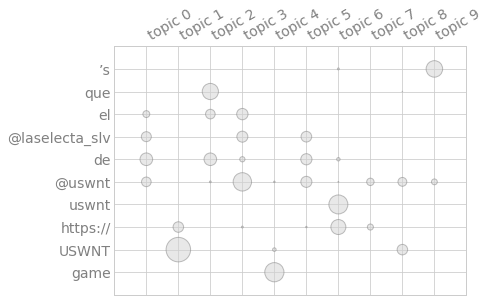

In [48]:
model.termite_plot(doc_term_matrix, vectorizer.id_to_term,
        topics=-1,  n_terms=10, sort_terms_by="seriation")

In [49]:
doc_topic_matrix = model.transform(doc_term_matrix)
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, topics=[0,1]):
          print('topic', topic_idx, ':', '   '.join(top_terms))
 
for i, val in enumerate(model.topic_weights(doc_topic_matrix)):
     print(i, val)
      

topic 0 : El_Salvador   de   Beach   laselecta_slv   Games   Quialifier   @laselecta_slv   @uswnt   femenino   Estados
topic 1 : USWNT   https://   take   remain   field   stage   center   http://   5hwinners   pic.twitter.com
0 0.08322159717915265
1 0.17921501226611236
2 0.07626364966177329
3 0.11878562490064
4 0.0911964146170466
5 0.06413364893747846
6 0.11333754493802306
7 0.10261132108776519
8 0.04064209592128323
9 0.13059309049072512


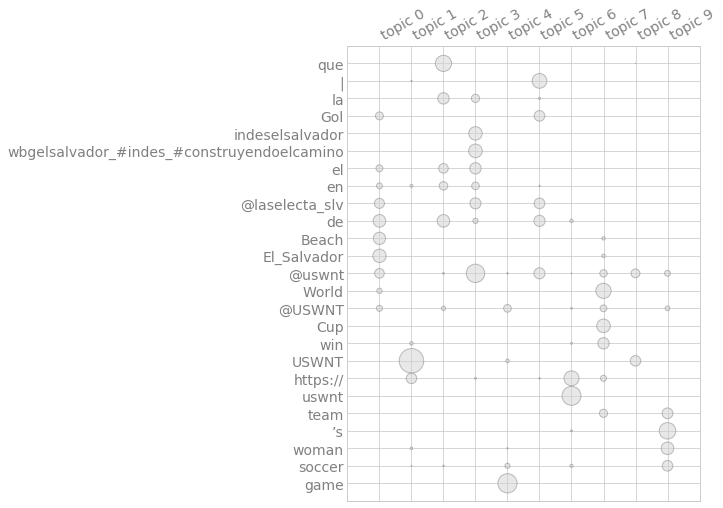

In [50]:
model.termite_plot(doc_term_matrix, vectorizer.id_to_term, topics=-1,  n_terms=25, sort_terms_by='seriation')  
model.save('nmf-10topics.pkl')        
